In [1]:
import pandas as pd
import numpy as np
import pprint 
import os

dir = '../data/_ventilador pulmonar_//'

In [2]:
basedir = "/content/drive/Shared drives/Transparência na Pandemia/" 

keyword = "ventilador pulmonar"
target_filepath = basedir +  keyword

! grep -r -i -C 10 --group-separator="==========" "$keyword" "$dir" > temp.txt

In [3]:
! sed -i 's_.*txt__g' temp.txt

In [4]:
with open("temp.txt", "r") as selected_contexts_file:
  file_content = selected_contexts_file.read()
  file_content_splitted = file_content.split("==========")


In [5]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Manual labelling if it is a transaction or not 
vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
X = vectorizer.fit_transform(file_content_splitted)


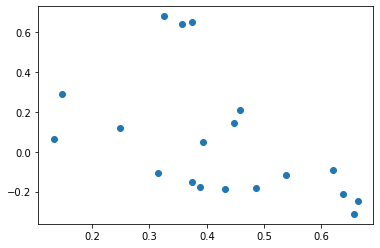

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

SVD = TruncatedSVD(n_components=2).fit(X)
data2D = SVD.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()

In [7]:
len(file_content_splitted)

19

In [ ]:
from IPython.display import clear_output

classes = []
for i in file_content_splitted:
        print(i)
        print("""
         Tipos possíveis:
         1 - compra (de ventilador ou acessório)
         2 - reparo/manutenção (de ventilador ou acessório)
         3 - aviso de convocação para licitação
         4 - registro de preços
         5 - licitação fracassada
         6 - outro    
        """)
        class_of_snippet = input("Qual é o tipo que mais se aproxima desse snippet?")
        
        classes.append(class_of_snippet)
        clear_output()


In [9]:
classes = ['compra', 'convocação', 'reparo'
           , 'registro', 'reparo', 'reparo', 'convocação', 'registro', 'convocação', 'convocação', 'reparo', 'convocação', 'convocação', 'registro', 'convocação', 'licitação fracassada', 'reparo', 'registro', 'compra']

import pandas as pd

df = pd.DataFrame({"classes":classes,
                   "text":file_content_splitted,
                   "d1": data2D[:,0],
                   "d2": data2D[:,1]})

In [10]:
df.head(3)

,classes,text,d1,d2
0,compra,-RATIFICAÇÃO DA AQUISIÇÃO POR DISPENSA DE LICI...,0.248562,0.116802
1,convocação,\n- Co...,0.388387,-0.179008
2,reparo,\n-2 01 Par Par d...,0.325616,0.679458


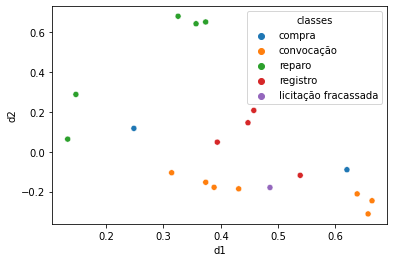

In [13]:
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

g = sns.scatterplot(x="d1", y="d2",
              hue="classes",
              data=df);

plot = g.get_figure()
plot.savefig("ventilador_raw.png")
